# Importing Libraries

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

 # Load and Explore the Dataset

In [90]:
df = pd.read_csv("Creditcard_data.csv")

print(df.info())
print(df.describe())
print(df['Class'].value_counts())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2


# Class Distribution Before SMOTE

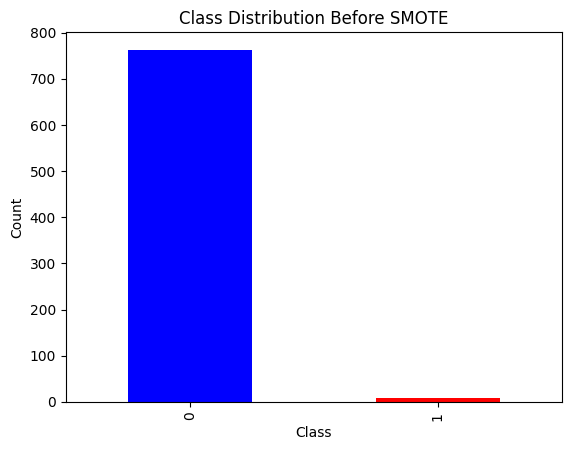

In [91]:
class_counts = df['Class'].value_counts()
class_proportions = df['Class'].value_counts(normalize=True) * 100

class_counts.plot(kind='bar', title='Class Distribution Before SMOTE', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Class Distribution After SMOTE

Original class distribution:
Class
0    763
1      9
Name: count, dtype: int64

Resampled class distribution:
Class
0    763
1    763
Name: count, dtype: int64


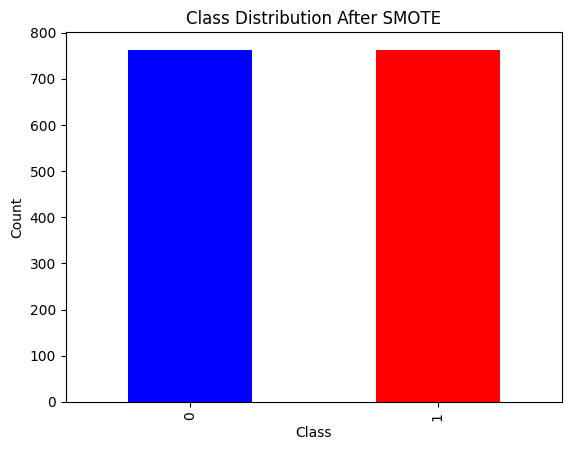

In [92]:
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target variable

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts())

y_resampled_counts = pd.Series(y_resampled).value_counts()
y_resampled_counts.plot(kind='bar', title='Class Distribution After SMOTE', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Simple Random Sampling

In [93]:
np.random.seed(42)

X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X, y, test_size=0.2, random_state=42)

# Stratified Sampling

In [94]:
stratified_split = list(StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(X, y))[0]
X_strat_train = X.iloc[stratified_split[0]]
y_strat_train = y.iloc[stratified_split[0]]

# Cluster Sampling

In [95]:
kmeans = KMeans(n_clusters=5, random_state=42)
X_clustered = X.copy()
X_clustered['Cluster'] = kmeans.fit_predict(X)
cluster_sample_indices = []
for cluster in range(5):
    cluster_indices = X_clustered[X_clustered['Cluster'] == cluster].index
    sample_indices = np.random.choice(cluster_indices, size=int(len(cluster_indices)*0.2), replace=False)
    cluster_sample_indices.extend(sample_indices)

X_cluster_sampled = X.loc[cluster_sample_indices]
y_cluster_sampled = y.loc[cluster_sample_indices]

# Bootstrap Sampling

In [96]:
bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
X_bootstrap = X.iloc[bootstrap_indices]
y_bootstrap = y.iloc[bootstrap_indices]

sampling_techniques = {
    'Simple Random Sampling': (X_train_random, y_train_random),
    'Bootstrap Sampling': (X_bootstrap, y_bootstrap),
    'Stratified Sampling': (X_strat_train, y_strat_train),
    'Cluster Sampling': (X_cluster_sampled, y_cluster_sampled)
}

# Training Model

In [97]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Model Evaluation

In [102]:
results = {}

for sampling_name, (X_sample, y_sample) in sampling_techniques.items():
    print(f"\nResults for {sampling_name}:")

    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    sampling_results = {}
    for model_name, model in models.items():
        try:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            accuracy = accuracy_score(y_test, y_pred)
            sampling_results[model_name] = accuracy * 100
            print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
        except Exception as e:
            print(f"Error with {model_name}: {e}")
            sampling_results[model_name] = 0

    results[sampling_name] = sampling_results

results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nDetailed Results:\n", results_df)


Results for Simple Random Sampling:
Random Forest Accuracy: 97.58%
Logistic Regression Accuracy: 97.58%
SVM Accuracy: 97.58%
Decision Tree Accuracy: 95.97%
KNN Accuracy: 97.58%

Results for Bootstrap Sampling:
Random Forest Accuracy: 99.35%
Logistic Regression Accuracy: 99.35%
SVM Accuracy: 99.35%
Decision Tree Accuracy: 98.71%
KNN Accuracy: 99.35%

Results for Stratified Sampling:
Random Forest Accuracy: 98.39%
Logistic Regression Accuracy: 98.39%
SVM Accuracy: 98.39%
Decision Tree Accuracy: 98.39%
KNN Accuracy: 98.39%

Results for Cluster Sampling:
Random Forest Accuracy: 100.00%
Logistic Regression Accuracy: 100.00%
SVM Accuracy: 100.00%
Decision Tree Accuracy: 100.00%
KNN Accuracy: 100.00%

Detailed Results:
                         Random Forest  Logistic Regression         SVM  \
Simple Random Sampling      97.580645            97.580645   97.580645   
Bootstrap Sampling          99.354839            99.354839   99.354839   
Stratified Sampling         98.387097            98.38

# Visualization of Accuracy

In [109]:
# Visualization of Accuracy
plt.figure(figsize=(10, 6))

# Flatten results into a DataFrame for easier plotting
results_df = pd.DataFrame.from_dict(results, orient='index')
results_melted = results_df.reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

# Create bar plot
plt.bar(results_melted['Model'], results_melted['Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(results_melted['Accuracy']):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('accuracy_comparison.png')
plt.close()

<ipython-input-109-1b869521ed64>:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=2.0)
